# Pandas - <span style="color:gray">explode( )</span>

In [7]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [11]:
df_exploded = df.explode('job_skills')

In [18]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

In [23]:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


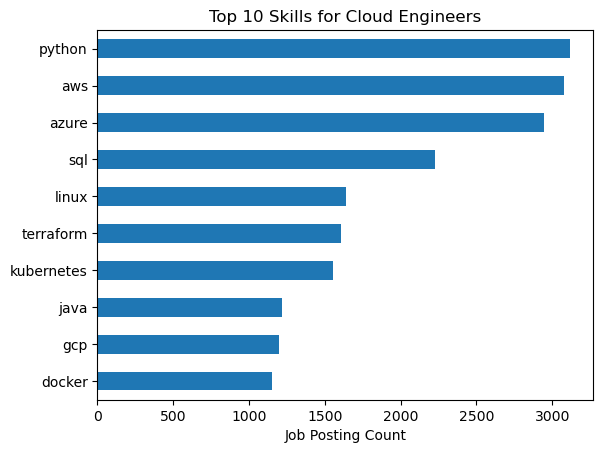

In [36]:
job_title = 'Cloud Engineer'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count', title=f'Top {top_skills} Skills for {job_title}s', legend=False)
plt.gca().invert_yaxis()
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.show()

<Axes: title={'center': 'Top 5 Skills by Average Salary'}, xlabel='job_skills'>

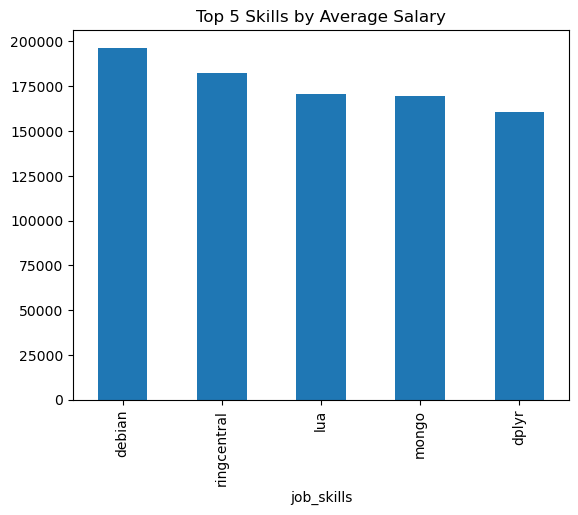

In [38]:
df_exploded.groupby('job_skills')['salary_year_avg'].mean().sort_values(ascending=False).head().plot(kind='bar', title='Top 5 Skills by Average Salary')

In [40]:
num_unique_skills = df_exploded.groupby('job_title_short')['job_skills'].nunique().head()

num_unique_skills

job_title_short
Business Analyst    223
Cloud Engineer      213
Data Analyst        235
Data Engineer       239
Data Scientist      237
Name: job_skills, dtype: int64